In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


df = pd.read_csv('UTKFace.csv')
df['pixels'] = df['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(48, 48, 1))
df['pixels'] = df['pixels'] / 255.0

X = np.stack(df['pixels'].values)
y_age = df['age'].values
y_gender = to_categorical(df['gender'].values)

# Split the data into training and testing sets
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(X, y_age, y_gender, test_size=0.3, random_state=101)


In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_layer = Input(shape=(48, 48, 1))

# First block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Second block
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Flattening and Dense layers
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

#gender output
gender_output = Dense(2, activation='softmax', name='gender_output')(x)  # For gender classification


In [2]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

input_layer2 = Input(shape=(48, 48, 1))

# First block
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer2)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Second block
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)


# Flattening and Dense layers
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.5)(x1)


# Output layer
age_output = Dense(1, activation='relu', name='age_output')(x1)  # For age prediction


In [3]:
model = Model(inputs=[input_layer, input_layer2], outputs=[age_output, gender_output])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 48, 48, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           320       ['input_1[0][0]']             
                                                                                              

                                                                                                  
 batch_normalization_1 (Bat  (None, 48, 48, 32)           128       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 32)           0         ['batch_normalization_6[0][0]'
 g2D)                                                               ]                             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)           0         ['batch_normalization_1[0][0]'
 D)                                                                 ]                             
                                                                                                  
 dropout_3

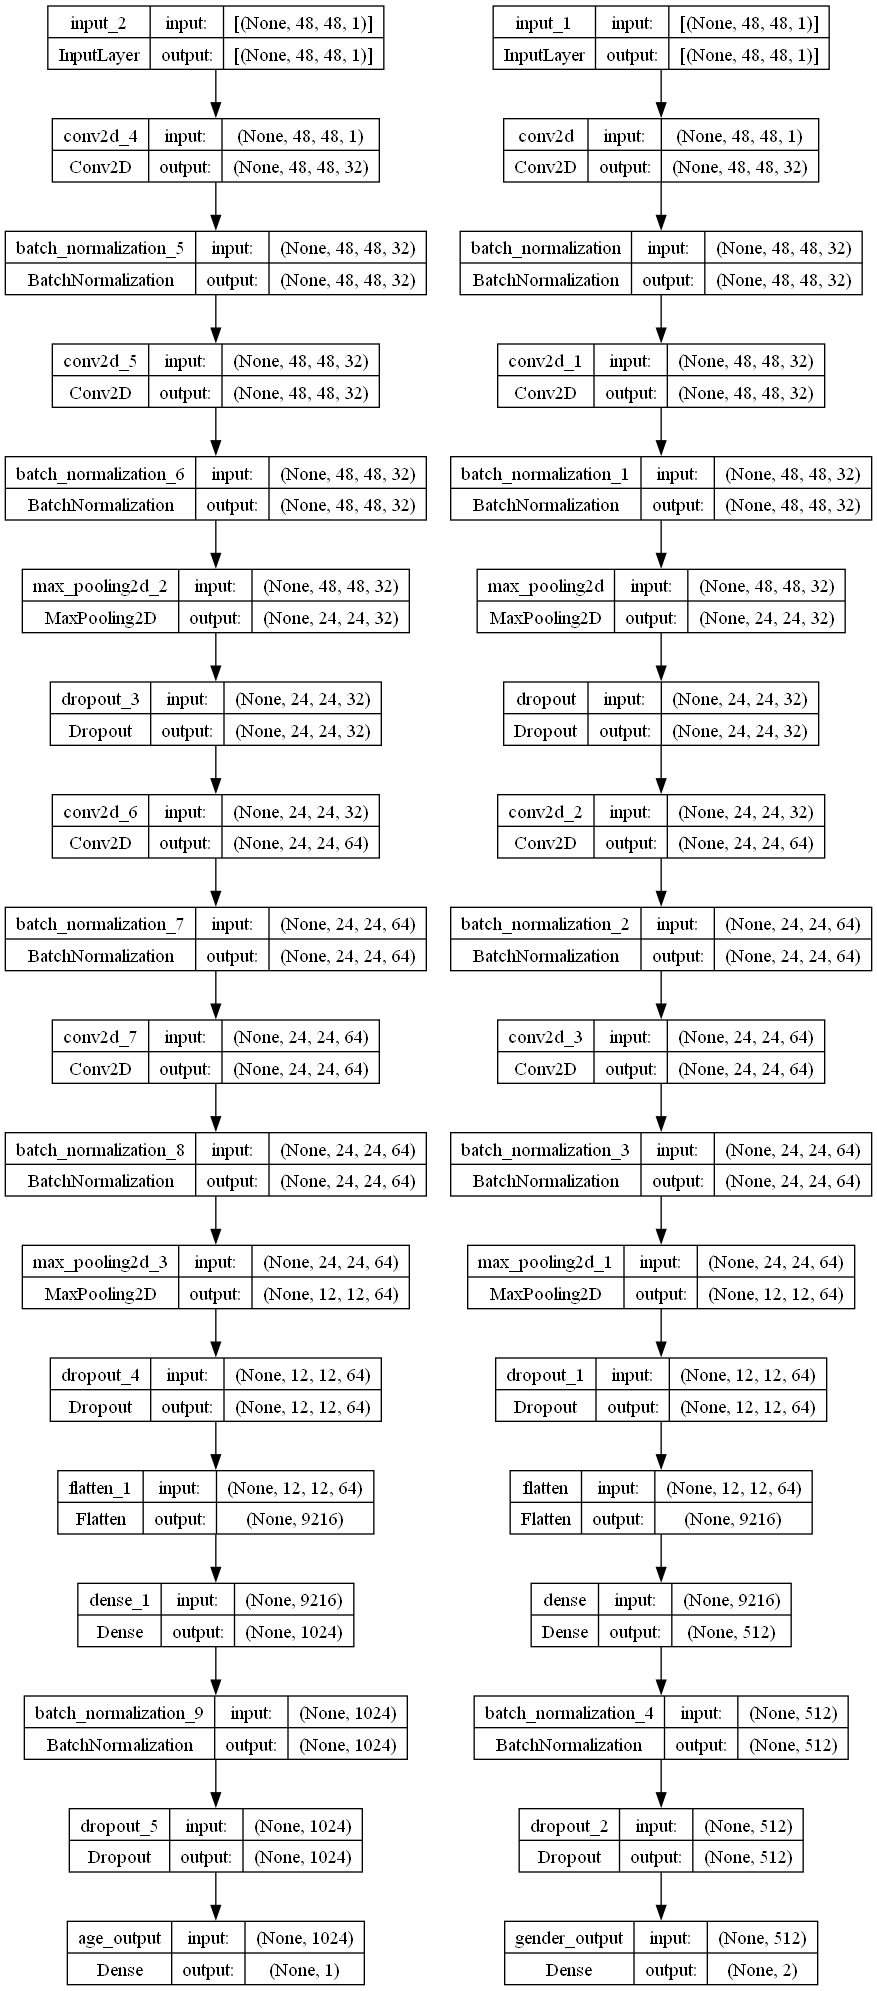

In [5]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)


In [ ]:
model.compile(optimizer='adam',
              loss={'age_output': 'mse', 'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'mse', 'gender_output': 'accuracy'})

model.fit([X_train,X_train], {'age_output': y_age_train, 'gender_output': y_gender_train},
          validation_data=([X_test,X_test], {'age_output': y_age_test, 'gender_output': y_gender_test}),
          epochs=50, batch_size=32)


Epoch 1/50
519/519 [==============================] - 291s 555ms/step - loss: 328.5662 - age_output_loss: 328.3010 - gender_output_loss: 0.2652 - age_output_mse: 328.3010 - gender_output_accuracy: 0.8871 - val_loss: 232.4015 - val_age_output_loss: 232.1128 - val_gender_output_loss: 0.2887 - val_age_output_mse: 232.1128 - val_gender_output_accuracy: 0.8763
Epoch 2/50
519/519 [==============================] - 294s 567ms/step - loss: 134.0143 - age_output_loss: 133.7665 - gender_output_loss: 0.2477 - age_output_mse: 133.7665 - gender_output_accuracy: 0.8933 - val_loss: 148.0801 - val_age_output_loss: 147.7830 - val_gender_output_loss: 0.2971 - val_age_output_mse: 147.7830 - val_gender_output_accuracy: 0.8905
Epoch 3/50
519/519 [==============================] - 286s 552ms/step - loss: 117.0082 - age_output_loss: 116.7822 - gender_output_loss: 0.2259 - age_output_mse: 116.7822 - gender_output_accuracy: 0.9077 - val_loss: 319.2863 - val_age_output_loss: 319.0362 - val_gender_output_loss: 0

In [ ]:
model.save('gen_age_final.h5')
